In [1]:
sys.path.append("../../galaxy_computer_vision_with_EFIGI_data")

In [2]:
# Cross validate and show scores
# using the scikit API for LGBM
from galaxyquest.gbm.GBM import GBM
gbm_model = GBM("../datasets\EFIGI_SIFT_feature_data_2kp_nothreshold.csv", "../datasets\EFIGI_labels.csv", 256)
nothreshold_cv_result = gbm_model.cross_validate(5)

In [3]:
# Show average accuracy for no thresholding
import numpy as np
np.mean(nothreshold_cv_result["test_accuracy"])

0.7442796172990492

[1]	valid_0's multi_logloss: 0.856985
[2]	valid_0's multi_logloss: 0.846818
[3]	valid_0's multi_logloss: 0.846013
[4]	valid_0's multi_logloss: 0.839582
[5]	valid_0's multi_logloss: 0.837473
[6]	valid_0's multi_logloss: 0.834349
[7]	valid_0's multi_logloss: 0.832461
[8]	valid_0's multi_logloss: 0.83511
[9]	valid_0's multi_logloss: 0.833573
[10]	valid_0's multi_logloss: 0.830145
[11]	valid_0's multi_logloss: 0.830064
[12]	valid_0's multi_logloss: 0.828129
[13]	valid_0's multi_logloss: 0.829488
[14]	valid_0's multi_logloss: 0.830166
[15]	valid_0's multi_logloss: 0.832956
[16]	valid_0's multi_logloss: 0.836949
[17]	valid_0's multi_logloss: 0.837276
[18]	valid_0's multi_logloss: 0.841674
[19]	valid_0's multi_logloss: 0.84236
[20]	valid_0's multi_logloss: 0.846933
[21]	valid_0's multi_logloss: 0.848298
[22]	valid_0's multi_logloss: 0.850441
[23]	valid_0's multi_logloss: 0.851197
[24]	valid_0's multi_logloss: 0.856897
[25]	valid_0's multi_logloss: 0.860619
[26]	valid_0's multi_logloss: 0.8623

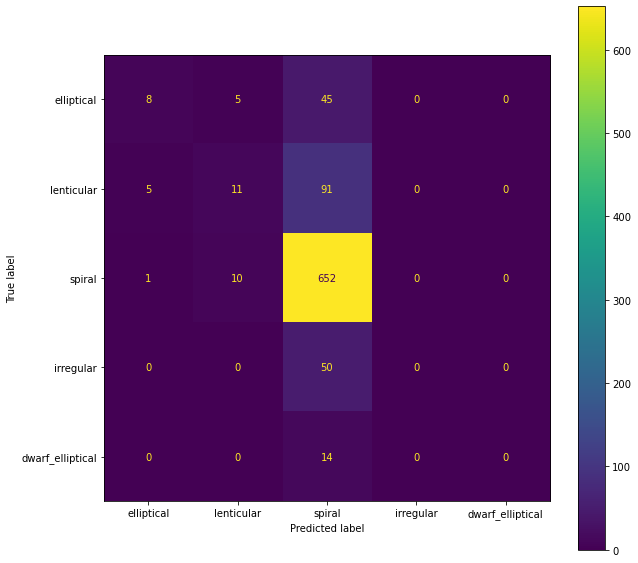

In [4]:
# Use our GBM api to plot a confusion matrix on the non-thresholded data.
from galaxyquest.gbm.GBM import GBM
gbm_model = GBM("../datasets\EFIGI_SIFT_feature_data_2kp_nothreshold.csv", "../datasets\EFIGI_labels.csv", 256)
gbm_model.train(0.2, 0.1)
labels = ["elliptical", "lenticular", "spiral", "irregular", "dwarf_elliptical"]
gbm_model.plot_confusion_matrix(labels)

In [5]:
from galaxyquest.gbm.GBM import GBM 
from galaxyquest.utilities import get_metrics_by_epoch
gbm_model = GBM("../datasets\EFIGI_SIFT_feature_data_2kp_nothreshold.csv", "../datasets\EFIGI_labels.csv", 256)
cv_results = gbm_model.cross_validate_predict(5)
metrics = get_metrics_by_epoch(cv_results["predictions"], cv_results["ground_truth_labels"])

../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:40: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:40: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:40: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:40: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:40: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:40: Ru

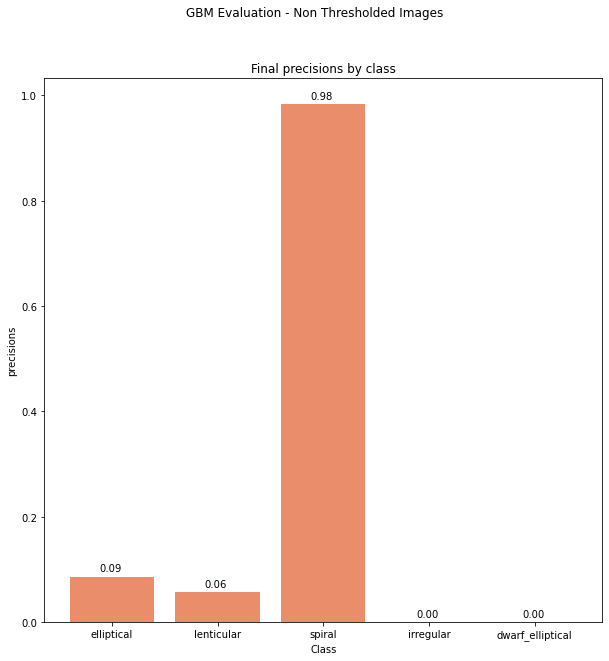

In [6]:
from galaxyquest.utilities import plot_metric_byclass
import seaborn as sns
sns.set_palette(sns.color_palette("flare"))
plot_metric_byclass(metrics, "precisions", ["elliptical", "lenticular", "spiral", "irregular", "dwarf_elliptical"], "GBM Evaluation - Non Thresholded Images")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


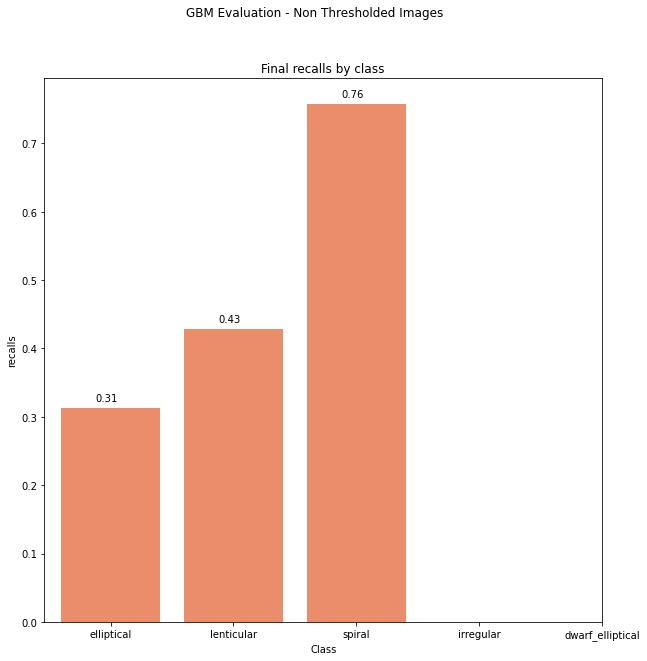

In [7]:
sns.set_palette(sns.color_palette("flare"))
plot_metric_byclass(metrics, "recalls", ["elliptical", "lenticular", "spiral", "irregular", "dwarf_elliptical"], "GBM Evaluation - Non Thresholded Images") 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


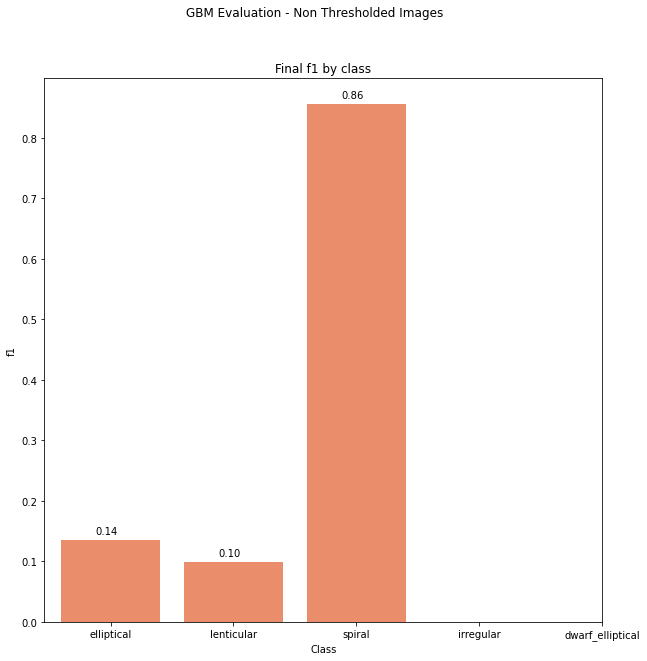

In [8]:
from galaxyquest.utilities import plot_metric_byclass
import seaborn as sns
sns.set_palette(sns.color_palette("flare"))
plot_metric_byclass(metrics, "f1", ["elliptical", "lenticular", "spiral", "irregular", "dwarf_elliptical"], "GBM Evaluation - Non Thresholded Images")

Log loss goes up during training. Interesting to note. Loss ends up at ~1.2 per the cross validation.

The model is clearly overfitting on the Spirals due to the class imbalance.

[1]	valid_0's multi_logloss: 0.904548
[2]	valid_0's multi_logloss: 0.896523
[3]	valid_0's multi_logloss: 0.897396
[4]	valid_0's multi_logloss: 0.89558
[5]	valid_0's multi_logloss: 0.897034
[6]	valid_0's multi_logloss: 0.896928
[7]	valid_0's multi_logloss: 0.898687
[8]	valid_0's multi_logloss: 0.89783
[9]	valid_0's multi_logloss: 0.898338
[10]	valid_0's multi_logloss: 0.902236
[11]	valid_0's multi_logloss: 0.900856
[12]	valid_0's multi_logloss: 0.900142
[13]	valid_0's multi_logloss: 0.897065
[14]	valid_0's multi_logloss: 0.900736
[15]	valid_0's multi_logloss: 0.900841
[16]	valid_0's multi_logloss: 0.902788
[17]	valid_0's multi_logloss: 0.902899
[18]	valid_0's multi_logloss: 0.904196
[19]	valid_0's multi_logloss: 0.908502
[20]	valid_0's multi_logloss: 0.910074
[21]	valid_0's multi_logloss: 0.912467
[22]	valid_0's multi_logloss: 0.914628
[23]	valid_0's multi_logloss: 0.917787
[24]	valid_0's multi_logloss: 0.921473
[25]	valid_0's multi_logloss: 0.926553
[26]	valid_0's multi_logloss: 0.9253

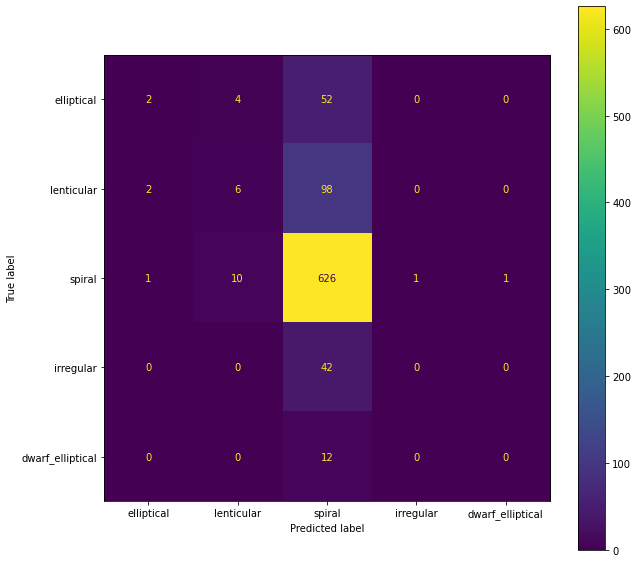

In [9]:
# Use our GBM api to plot a confusion matrix on thethresholded data.
from galaxyquest.gbm.GBM import GBM
gbm_model = GBM("../datasets\EFIGI_SIFT_feature_data_2kp_threshold.csv", "../datasets\EFIGI_labels.csv", 256)
gbm_model.train(0.2, 0.1)
labels = ["elliptical", "lenticular", "spiral", "irregular", "dwarf_elliptical"]
gbm_model.plot_confusion_matrix(labels)

In [10]:
from galaxyquest.gbm.GBM import GBM 
from galaxyquest.utilities import get_metrics_by_epoch
gbm_model = GBM("../datasets\EFIGI_SIFT_feature_data_2kp_threshold.csv", "../datasets\EFIGI_labels.csv", 256)
cv_results = gbm_model.cross_validate_predict(5)
metrics = get_metrics_by_epoch(cv_results["predictions"], cv_results["ground_truth_labels"])

../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:44: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:44: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:44: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:44: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:44: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (pre

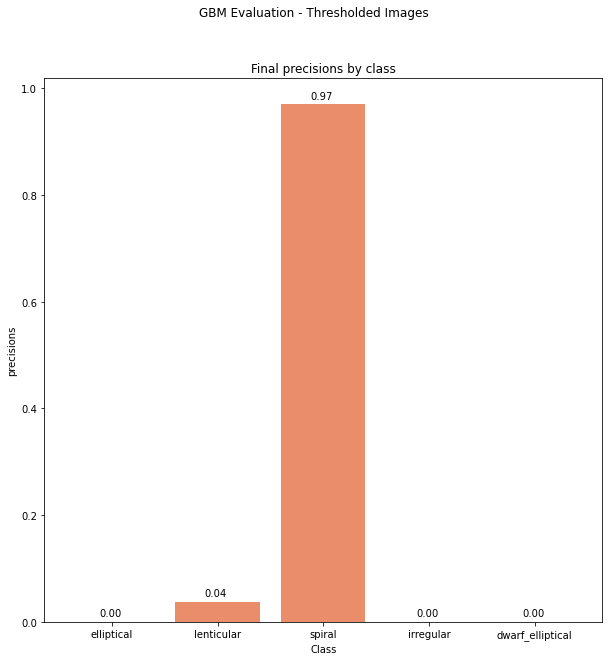

In [11]:
from galaxyquest.utilities import plot_metric_byclass
import seaborn as sns
sns.set_palette(sns.color_palette("flare"))
plot_metric_byclass(metrics, "precisions", ["elliptical", "lenticular", "spiral", "irregular", "dwarf_elliptical"], "GBM Evaluation - Thresholded Images")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


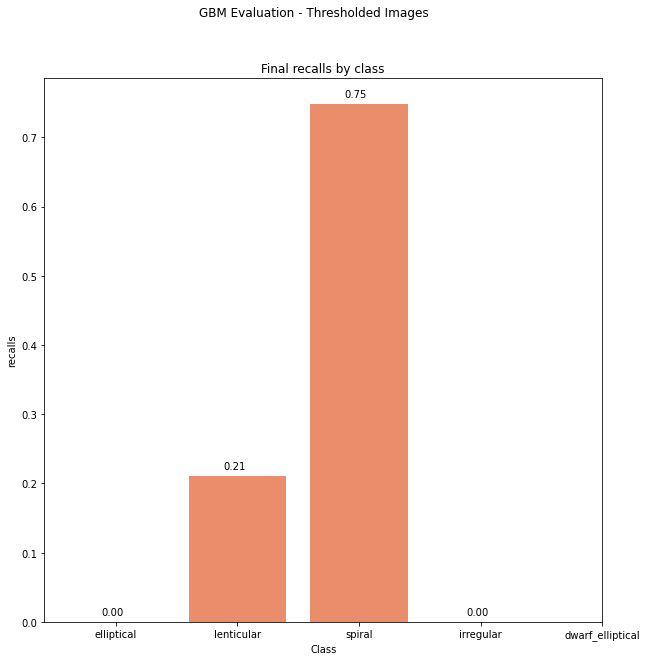

In [12]:
sns.set_palette(sns.color_palette("flare"))
plot_metric_byclass(metrics, "recalls", ["elliptical", "lenticular", "spiral", "irregular", "dwarf_elliptical"], "GBM Evaluation - Thresholded Images") 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


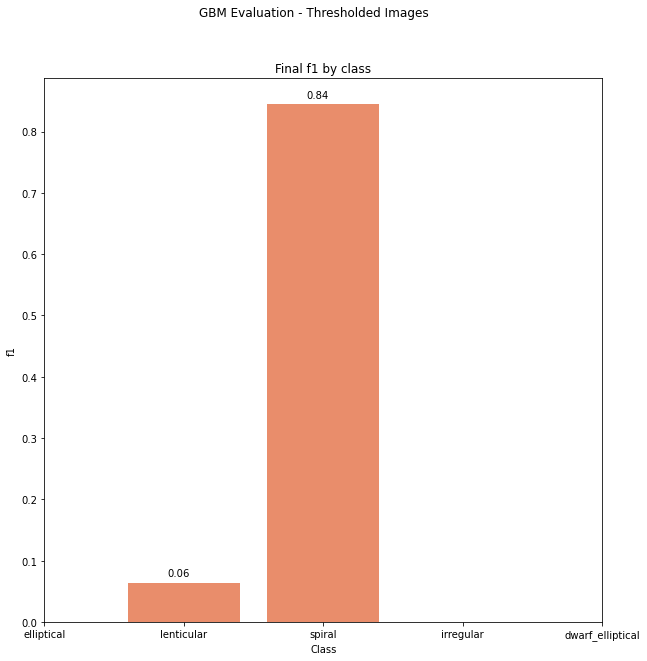

In [13]:
from galaxyquest.utilities import plot_metric_byclass
import seaborn as sns
sns.set_palette(sns.color_palette("flare"))
plot_metric_byclass(metrics, "f1", ["elliptical", "lenticular", "spiral", "irregular", "dwarf_elliptical"], "GBM Evaluation - Thresholded Images")

In [14]:
Labels:

0: Elliptical

1: Lenticular

2: Spiral

3: Irregular

4: Dwarf Spheroid Elliptical

SyntaxError: invalid syntax (<ipython-input-14-6a8bb73ad5f8>, line 1)